<a href="https://colab.research.google.com/github/AdrianGuel/SistemasMecanicos/blob/main/MSDanimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

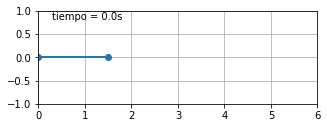

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

k=0.2
m=1
b=0.5
t_stop = 30  # tiempo de simulación


#Modelo dinámico
def derivs(state, t):
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -k*state[0]/m-b*state[1]/m
    return dydx

# tiempo
dt = 0.05
t = np.arange(0, t_stop, dt)

#condiciones iniciales
x10 = 0.5
x20 = 0.5

# estado inicial
state = [x10, x20]

# solución numérica
y = integrate.odeint(derivs, state, t)

x1 = y[:, 0]

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 6), ylim=(-1, 1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'tiempo = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    li=1
    thisx = [x1[i]+li,0]
    line.set_data(thisx,0)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
plt.show()